# NetworkX 모듈을 활용한 소셜 네트워크 분석

In [10]:
conda install -c anaconda networkx

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\82103\anaconda3

  added / updated specs:
    - networkx


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.4                |           py37_0         3.1 MB  anaconda
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.8.2-py37_0 --> anaconda::conda-4.8.4-py37_0




conda-4.8.4          | 3.1 MB    |            |   0% 
conda-4.8.4          | 3.1 MB    | 4          |   5% 
conda-4.8.4          | 3.1 MB    | ###6       |  37% 
conda-4.8.4          | 3.1 MB    | ########4  |  84% 
conda-4.8.4          | 3.1 MB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Execu



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda




In [11]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

## 1. 소셜 네트워크 기본

- Node, Vertex : 네트워크의 점
- Edge, Link : 네트워크 노드 간의 관계, 연결

### 1-1. 무방향 (undirected) 네트워크

> 아래 네트워크는 함께 일하는 사람들의 그룹이다. 관계가 대칭이기 때문에 대칭 네트워크라고 부르고, A와 B가 관련이 있으면 B와 A도 관련이 있는 것이다.

In [12]:
G_symmetric = nx.Graph()

G_symmetric.add_edge('Steven',  'Laura')
G_symmetric.add_edge('Steven',  'Marc')
G_symmetric.add_edge('Steven',  'John')
G_symmetric.add_edge('Steven',  'Michelle')
G_symmetric.add_edge('Laura',   'Michelle')
G_symmetric.add_edge('Michelle','Marc')
G_symmetric.add_edge('George',  'John')
G_symmetric.add_edge('George',  'Steven')

In [13]:
print(nx.info(G_symmetric))

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 8
Average degree:   2.6667


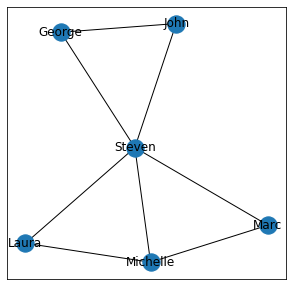

In [14]:
plt.figure(figsize=(5,5))
nx.draw_networkx(G_symmetric)

### 1-2. 방향 (directed) 네트워크

> 노드 간의 관계가 자식 관계 (child of)라면 대칭이 아닌 비대칭 네트워크라고 부른다. 예를 들어 SNS에서 다른 사람을 팔로우 하는 경우가 있다. 이는 방향 네트워크라고 부른다. 앞선 nx.Graph에 이어 Directional Graph를 뜻하는 DiGraph 방식으로 네트워크를 구축할 수 있다.

In [15]:
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')

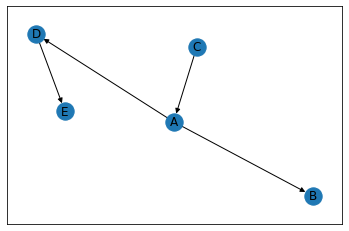

In [16]:
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)

### 1-3. 가중 (valued) 네트워크

> 네트워크 그래프에서 노드 간 관계의 유무 뿐 아니라 관계의 정도(가중치)를 함께 표시 할 수 있다. 관계의 정도를 나타내는 방법은 해당 링크 옆에 가중치를 직접 표시하거나, 가중치의 정도에 따라 링크 선의 굵기를 다르게 표시하는 방법이 있다.

In [17]:
G_weighted = nx.Graph()

G_weighted.add_edge('Steven',  'Laura',   weight=25)
G_weighted.add_edge('Steven',  'Marc',    weight=8)
G_weighted.add_edge('Steven',  'John',    weight=11)
G_weighted.add_edge('Steven',  'Michelle',weight=1)
G_weighted.add_edge('Laura',   'Michelle',weight=1)
G_weighted.add_edge('Michelle','Marc',    weight=1)
G_weighted.add_edge('George',  'John',    weight=8)
G_weighted.add_edge('George',  'Steven',  weight=4)

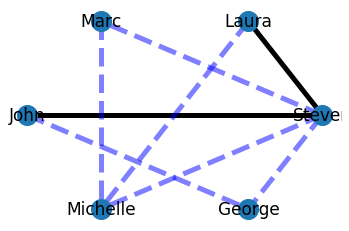

In [26]:
# 경중(가중치)의 기준을 연구 목적/주제에 맞게 설정해준다. (현재=8)
elarge = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] > 8]
esmall = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] <= 8]

pos = nx.circular_layout(G_weighted)  # positions for all nodes

# 노드 시각화 설정
nx.draw_networkx_nodes(G_weighted, pos, node_size=400)

# 링크 시각화 설정
nx.draw_networkx_edges(G_weighted, pos, edgelist=elarge,width=5)
nx.draw_networkx_edges(G_weighted, pos, edgelist=esmall,width=5, alpha=0.5, edge_color='b', style='dashed')

# 노드 라벨(이름) 시각화 설정
nx.draw_networkx_labels(G_weighted, pos, font_size=17, font_family='sans-serif')

plt.axis('off')
plt.show();

## 2. 클러스터링 계수

> 그래프 이론에서 각각의 노드들이 서로 뭉치는 경향을 알 수 있는 한 척도로 집단화 계수(Clustering coefficient)가 사용된다. 간단하게 말해서 특정 노드와 이웃한 노드들이 서로 연결되어 있을 확률입니다. 확률이기 때문에 0부터 1사이의 값을 갖는다.

In [29]:
round(nx.clustering(G_weighted,'Michelle'),2)

0.67

In [30]:
round(nx.average_clustering(G_weighted),2)

0.83

## 3. 네트워크 거리 측정

### 3-1. 연결정도 (degree)

> 노드에 연결된 수를 정의한다. NetworkX에는 nx.degree로 네트워크에서 노드의 연결정도를 결정할 수 있다. 

In [31]:
nx.degree(G_symmetric, 'Michelle')

3

### 3-2. 연결거리 (distance)

> nx.shortest_path (Graph, Node1, Node2) 및 nx.shortest_path_length (Graph, Node1, Node2) 함수를 사용하여 NetworkX에서 두 노드 간의 최단 경로와 해당 길이를 확인할 수도 있다.

In [32]:
nx.shortest_path(G_symmetric, 'Michelle', 'John')

['Michelle', 'Steven', 'John']

In [33]:
nx.shortest_path_length(G_symmetric, 'Michelle', 'John')

2

### 3-3. 폭 우선 검색 (breadth-first search)

> 해당 노드에서 시작하여 폭 우선 검색 알고리즘을 사용하여 네트워크의 다른 모든 노드에서 노드까지의 거리를 찾을 수 있습니다. networkX는이를 수행하기 위해 bfs_tree 함수를 제공한다.

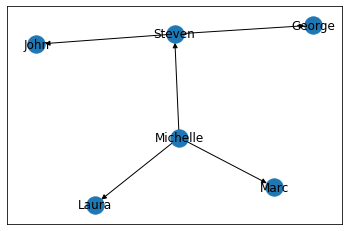

In [36]:
M = nx.bfs_tree(G_symmetric, 'Michelle')
nx.draw_networkx(M)

## 4. 중심성 측정

> 중심성 측정은 네트워크에서 가장 중요한 노드를 찾는 방법이다. 프리드만은 네트워크 상에서 각 노드의 중심성을 측정하는 세 가지 지표를 소개했다. 
1. 연결정도 중심성 (Degree centrality)
2. 근접 중심성 (Closeness centrality)
3. 매개 중심성 (Betweenness centrality)

### 4-1. 연결정도 중심성

> 노드에 연결된 수를 측정 한다. 중요한 노드에는 많은 연결이 있다는 사실을 기반으로 한다. NetworkX에는 네트워크의 모든 노드의 중심성을 계산하는 degree_centrality () 함수가 있다.

In [37]:
nx.degree_centrality(G_symmetric)

{'Steven': 1.0,
 'Laura': 0.4,
 'Marc': 0.4,
 'John': 0.4,
 'Michelle': 0.6000000000000001,
 'George': 0.4}

### 4-2. 근접 중심성

> 근접 중심성은 각 노드의 중요도가 다른 모든 노드에 대한 근접성에 의해 결정되는 측정이다.

In [39]:
nx.closeness_centrality(G_symmetric)

{'Steven': 1.0,
 'Laura': 0.625,
 'Marc': 0.625,
 'John': 0.625,
 'Michelle': 0.7142857142857143,
 'George': 0.625}

### 4-3. 매개 중심성

> 매개 중심성이 높은 노드는 네트워크 내의 통신 / 정보 흐름에서 중요한 역할을 한다. 산출법은 특정 노드가 다른 두 노드 사이에서 선택한 최단 경로로 오는 횟수를 수량화하는 것이다. Networkx에는 네트워크를 측정하는 betweenness_centrality () 함수가 있다. 사이 값을 정규화할지 여부, 가중치를 중심성 계산에 포함할지 여부를 선택하고 최단 경로 수에 끝점을 포함할지 여부를 선택할 수있는 옵션이 있다.

In [40]:
nx.betweenness_centrality(G_symmetric)

{'Steven': 0.65,
 'Laura': 0.0,
 'Marc': 0.0,
 'John': 0.0,
 'Michelle': 0.05,
 'George': 0.0}

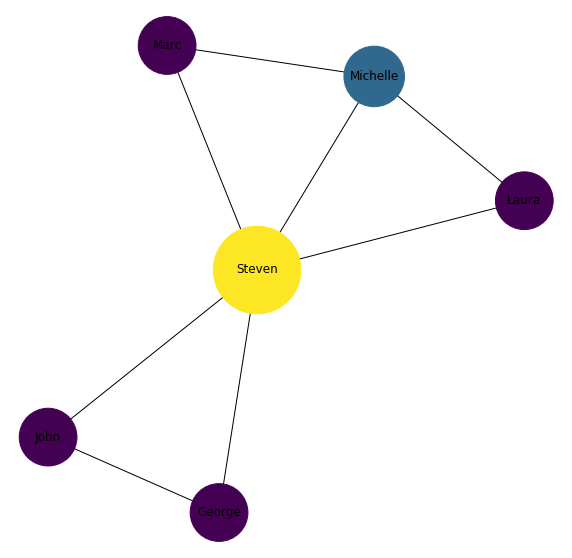

In [41]:
pos = nx.spring_layout(G_symmetric)
betCent = nx.betweenness_centrality(G_symmetric, normalized=True, endpoints=True)
node_color = [20000.0 * G_symmetric.degree(v) for v in G_symmetric]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(G_symmetric, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

In [42]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

['Steven', 'Michelle', 'Laura', 'Marc', 'John']